In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
customers = pd.read_csv('customers.csv')
customers

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
customers.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [5]:
customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Text(0.5, 1.0, 'Spending Score (1-100) vs Age')

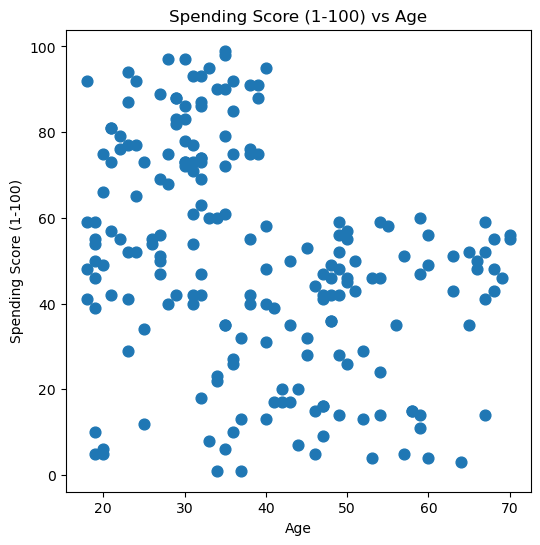

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(x='Age', y='Spending Score (1-100)',  data=customers, s=60)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Age')

In [7]:
customers_variables = customers.drop(['CustomerID','Gender','Annual Income (k$)'],axis=1)
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [8]:
customers_norm=customers_variables

In [9]:
clustering = KMeans(n_clusters=5,max_iter =300)
clustering.fit(customers_norm)

KMeans(n_clusters=5)

In [10]:
km1 = KMeans(algorithm='auto',copy_x=True, init='k-means++', max_iter=300,
             n_clusters=5,n_init=10,random_state=None,tol=0.001,verbose=1)

In [11]:
km1.fit(customers_norm)
y = km1.predict(customers_norm)

Initialization complete
Iteration 0, inertia 32588.0
Iteration 1, inertia 26017.59324246349
Iteration 2, inertia 25321.24821727997
Iteration 3, inertia 25209.560467970765
Iteration 4, inertia 25137.993080945824
Converged at iteration 4: center shift 0.2559322947996891 within tolerance 0.42883874999999977.
Initialization complete
Iteration 0, inertia 31017.0
Iteration 1, inertia 26017.512223269565
Iteration 2, inertia 25154.98458267322
Iteration 3, inertia 24850.504966607252
Iteration 4, inertia 24408.872187549794
Iteration 5, inertia 24147.06832277667
Iteration 6, inertia 24054.922638911976
Iteration 7, inertia 24011.288974873405
Iteration 8, inertia 23975.28754812808
Iteration 9, inertia 23938.814142739768
Iteration 10, inertia 23928.848782919373
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 40847.0
Iteration 1, inertia 24604.68890466985
Iteration 2, inertia 24473.987393970987
Converged at iteration 2: strict convergence.
Initialization co

In [12]:
customers_norm['label'] =y
customers["label"] = y

Text(0.5, 1.0, 'Spending Score (1-100) vs Age')

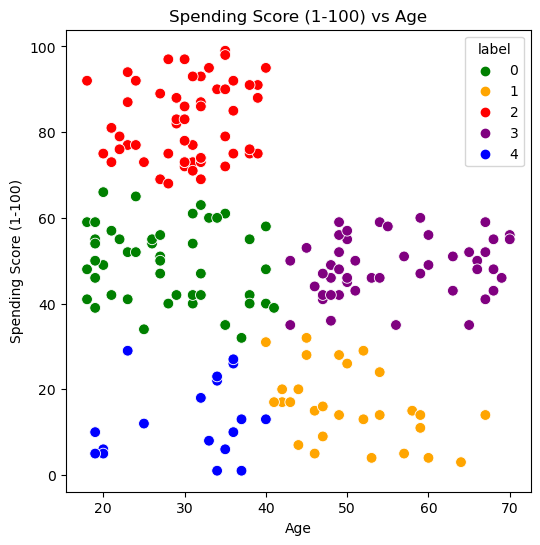

In [13]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue="label",palette=['green','orange','red','purple','blue'],
                data=customers_norm, s=60)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Spending Score (1-100) vs Age')